Вручную найденный фрагмент с хорошим качеством

- `data/freq_11-09-2023_13h-05m.log`: 11-я последовательность

In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
from matplotlib import pyplot as plt

from load_serie import load_serie
from denoize import create_denoized_spline, build_box_plot
from shot_detector import detect_shots

In [55]:
file = 'data/freq_11-09-2023_13h-05m.log'
serie_n = 16

serie = load_serie(file, serie_n)

dns, _ = create_denoized_spline(serie, 0.1)

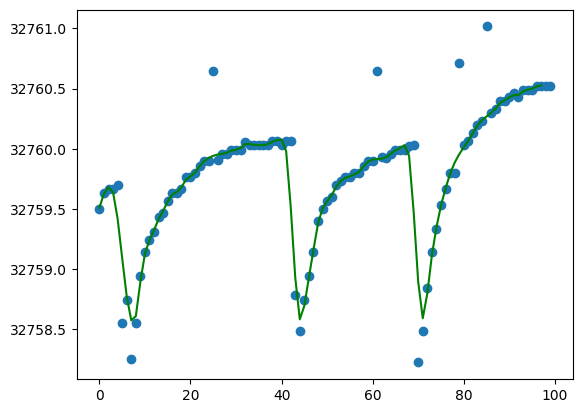

In [56]:
filtred_serie = [dns.Y(i) for i in range(len(serie) - 2)]

plt.plot(serie, marker='o', linestyle='None')
plt.plot(filtred_serie, color='green')

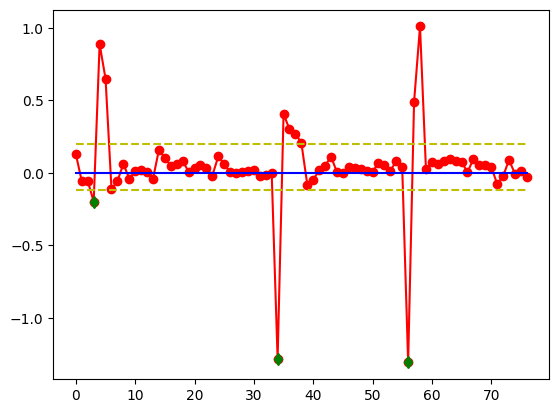

In [57]:

derivate_serie = [dns.dY(p.X) for p in dns.Points[:-2]]
derivatire_bxplt = build_box_plot(derivate_serie)

shots = list(detect_shots(derivate_serie, derivatire_bxplt['lower_bound'], derivatire_bxplt['upper_bound']))

shots_points = [derivate_serie[i] for i in shots]

plt.plot(derivate_serie, 'ro-',
         [derivatire_bxplt['lower_bound']] * len(derivate_serie), 'y--',
         [derivatire_bxplt['upper_bound']] * len(derivate_serie), 'y--',
         [0.0] * len(derivate_serie), 'b-',
         shots, shots_points, 'gd')

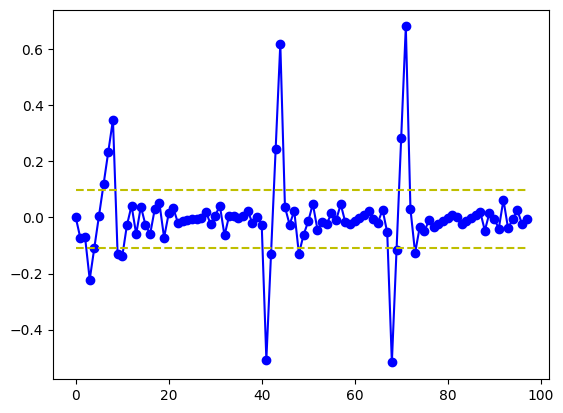

In [58]:
derivate_serie2 = [dns.d2Y(i) for i in range(len(serie) - 2)]
derivatire2_bxplt = build_box_plot(derivate_serie2)

plt.plot(derivate_serie2, 'bo-',
            [derivatire2_bxplt['lower_bound']] * len(derivate_serie2), 'y--',
            [derivatire2_bxplt['upper_bound']] * len(derivate_serie2), 'y--')